<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L7_5Nonlinear_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

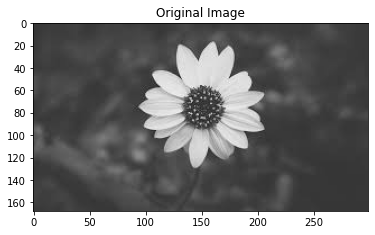

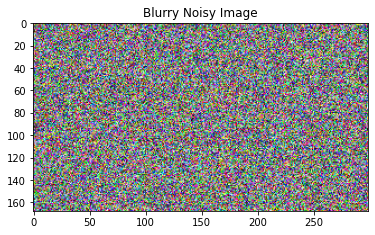

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

In [3]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image from URL
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/flower.jfif'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
Img = cv2.imdecode(arr, -1)

# display original image
plt.figure()
plt.imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# blur and add noise to original image
blur_avg = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
#BlurredImg = cv2.filter2D(Img, -1, blur_avg, borderType=cv2.BORDER_WRAP)
BlurredImg = cv2.filter2D(Img, -1, blur_avg, borderType=cv2.BORDER_DEFAULT)

noise_var = 8
noise = np.random.randn(*Img.shape) * np.sqrt(noise_var) * 255
NoisyImg = cv2.add(BlurredImg, noise, dtype=cv2.CV_64F)

# display blurry noisy image
plt.figure()
plt.imshow(cv2.cvtColor(NoisyImg.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Blurry Noisy Image')
plt.show()

# generate high-pass-filtered images
kernel1 = np.array([-0.5, 1, -0.5]).reshape(-1, 1)
kernel2 = np.array([-0.5, 1, -0.5]).reshape(1, -1)
kernel3 = np.array([[-0.5, 0, 0], [0, 1, 0], [0, 0, -0.5]])
kernel4 = np.array([[0, 0, -0.5], [0, 1, 0], [-0.5, 0, 0]])
H1 = cv2.filter2D(NoisyImg, -1, kernel1, borderType=cv2.BORDER_DEFAULT)
H2 = cv2.filter2D(NoisyImg, -1, kernel2, borderType=cv2.BORDER_DEFAULT)
H3 = cv2.filter2D(NoisyImg, -1, kernel3, borderType=cv2.BORDER_DEFAULT)
H4 = cv2.filter2D(NoisyImg, -1, kernel4, borderType=cv2.BORDER_DEFAULT)

# soft_scale images
gamma = 2
tau = 8
scaling = 3

def soft_scaling(image, gamma, tau, scaling):
    abs_image = np.abs(image) ** gamma
    mean_val = np.mean(abs_image)
    threshold = tau * mean_val
    result = np.where(abs_image >= threshold, abs_image, scaling * mean_val * (abs_image / threshold) ** (1/gamma))
    return np.sign(image) * result

H1t = soft_scaling(H1, gamma, tau, scaling)
H2t = soft_scaling(H2, gamma, tau, scaling)
H3t = soft_scaling(H3, gamma, tau, scaling)
H4t = soft_scaling(H4, gamma, tau, scaling)

# generate denoise and sharpen images
alpha = 0.5
Img1 = NoisyImg - (H1+H2+H3+H4)*alpha + (H1t+H2t+H3t+H4t)*alpha

# display denoise and sharpen image
plt.figure()
plt.imshow

